0.19812763981356457 0.18146486011831162
Полная погрешность: [np.float64(-1.1040825869298072e-07), np.float64(8.908638402897277e-08)] для шага 0.07290680902062516


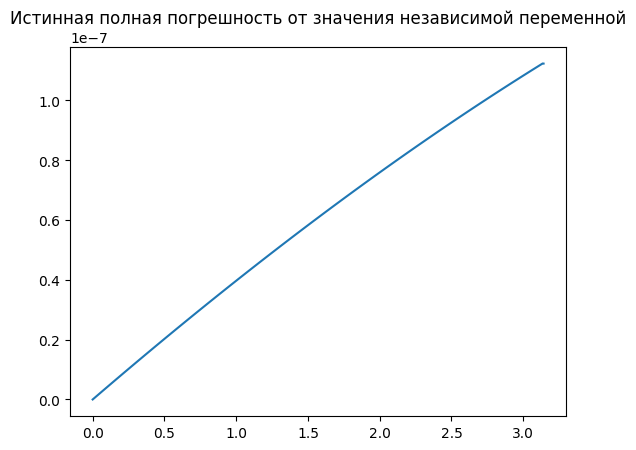

ЯМРК-2 с постоянным шагом: 
 [np.float64(0.19812775214492626), np.float64(0.1814647687136841)]
Полная погрешность: [np.float64(-6.764892511411975e-05), np.float64(5.5774152783742504e-05)] для шага 0.039269845183451196


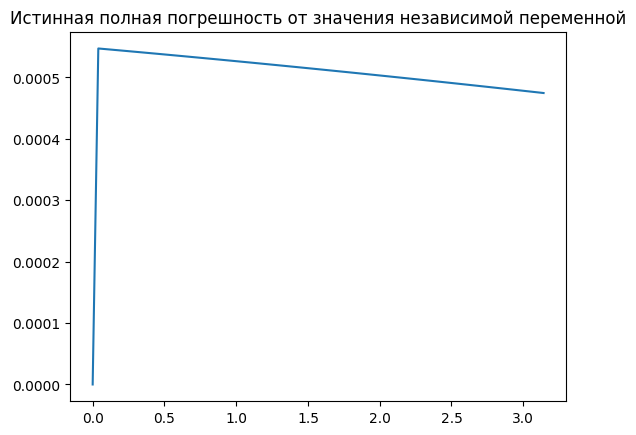

ЯМРК-3 с постоянным шагом: 
 [np.float64(0.19860220329206177), np.float64(0.18107537194731402)]


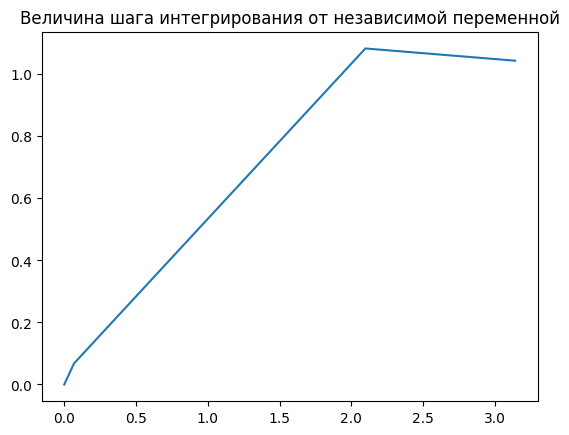

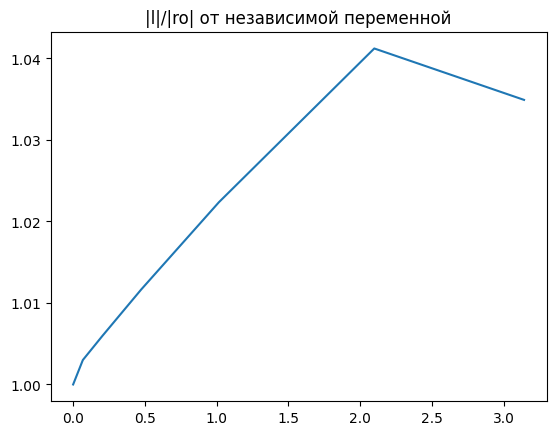

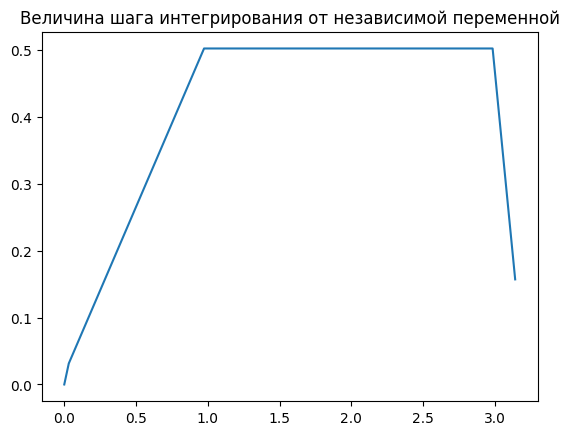

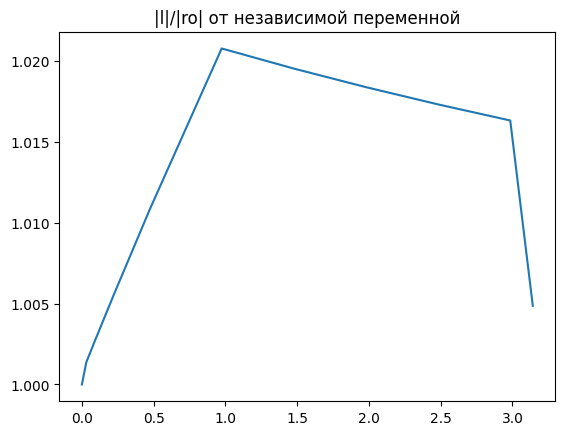

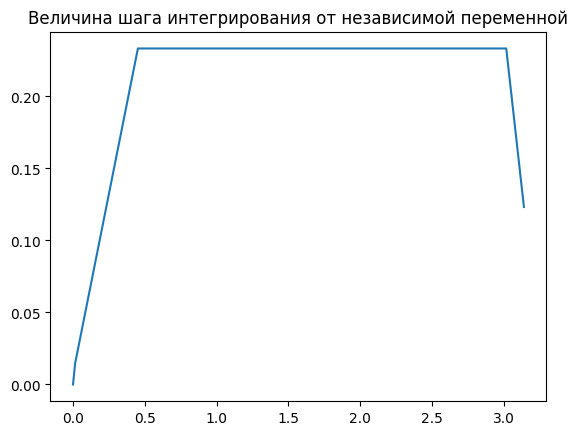

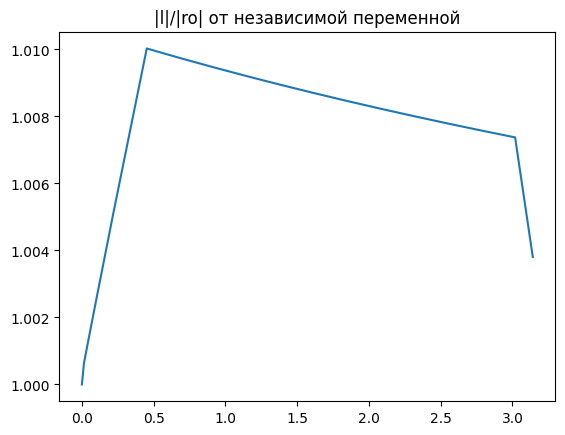

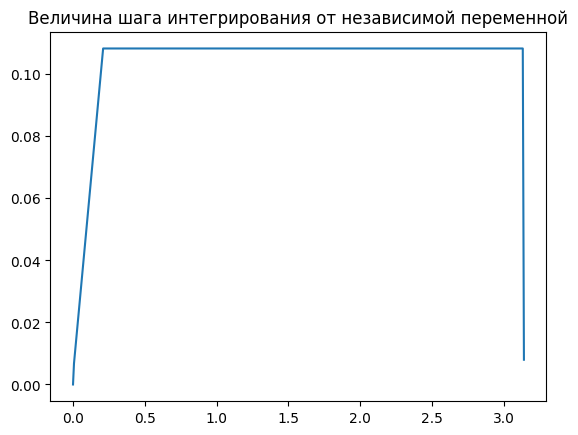

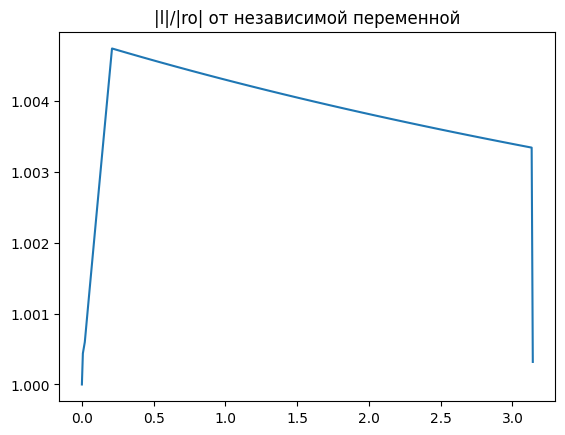

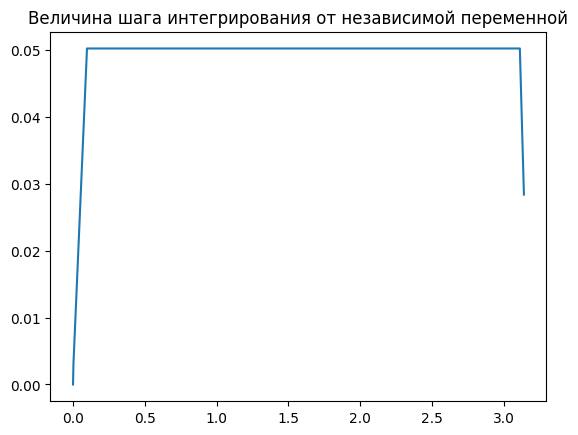

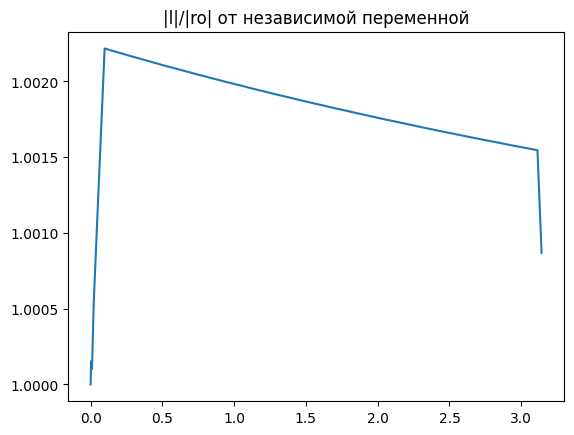

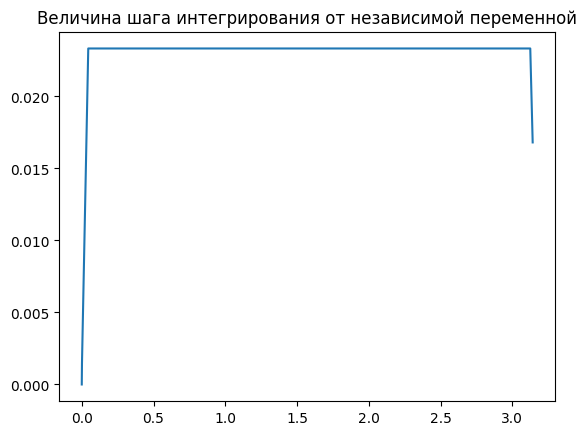

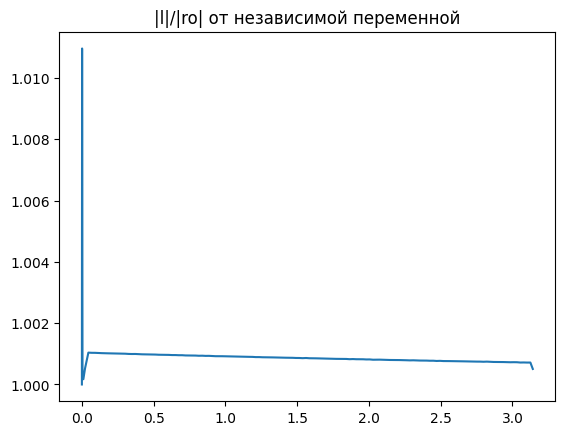

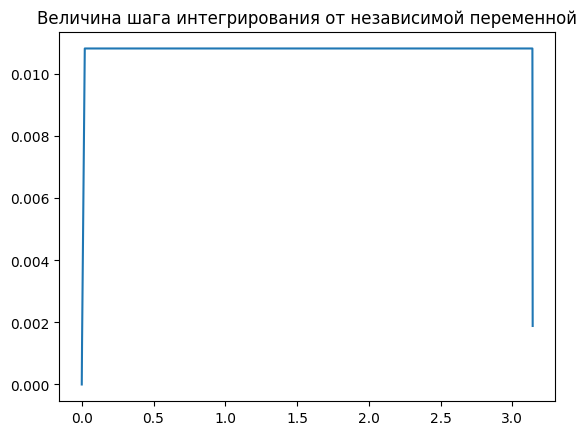

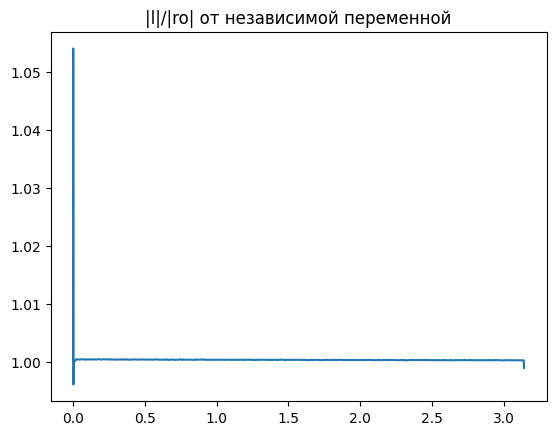

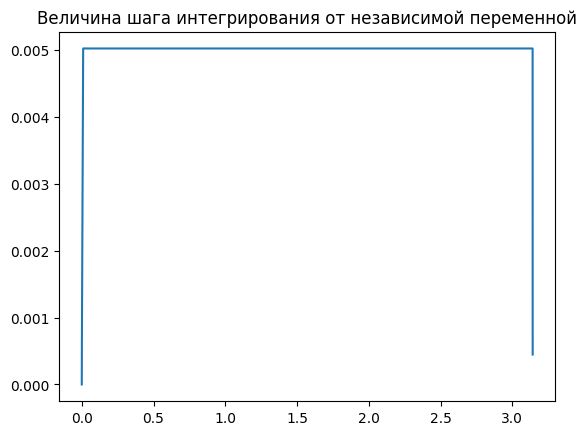

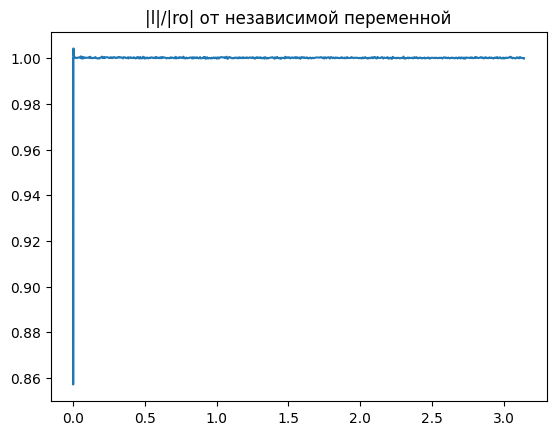

C:\Users\sasha\AppData\Local\Temp\ipykernel_31192\891664946.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  error_value = [1, max(l[0] / ro[0], l[1] / ro[1])]


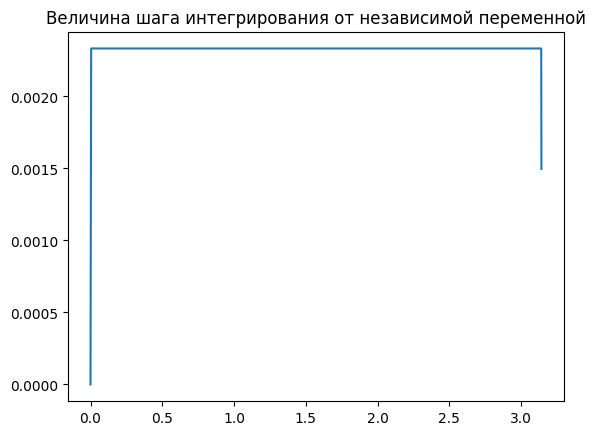

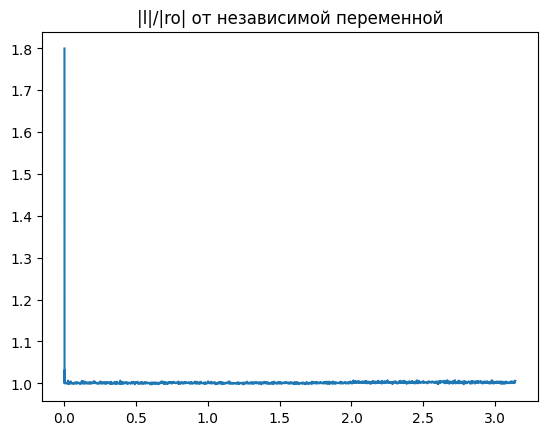

C:\Users\sasha\AppData\Local\Temp\ipykernel_31192\891664946.py:201: RuntimeWarning: divide by zero encountered in scalar divide
  error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
C:\Users\sasha\AppData\Local\Temp\ipykernel_31192\891664946.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  error_value.append(max(l[0] / ro[0], l[1] / ro[1]))


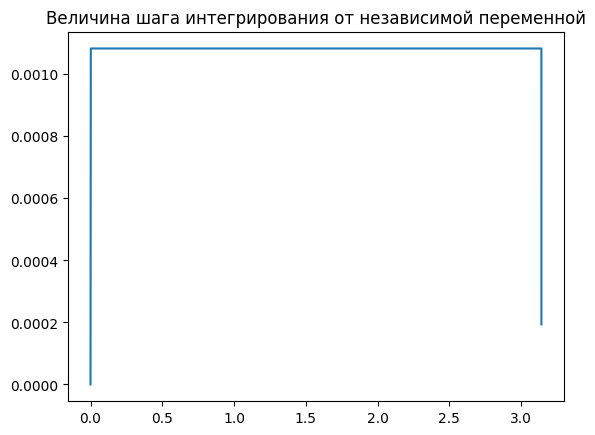

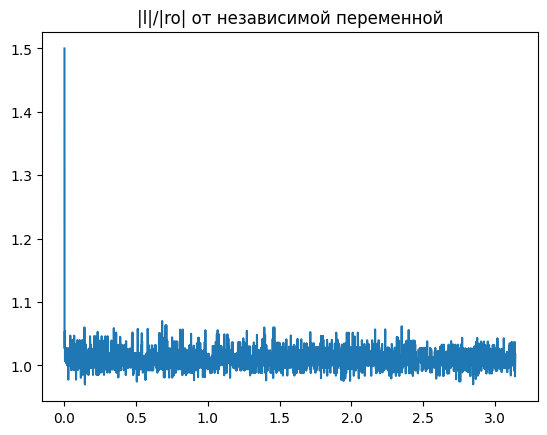

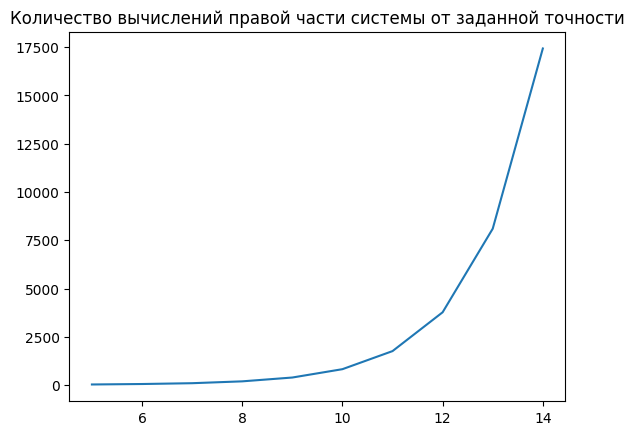

ЯМРК-2 с автоматическим шагом: 
 [np.float64(0.19812763981975393), np.float64(0.18146486011324356)]


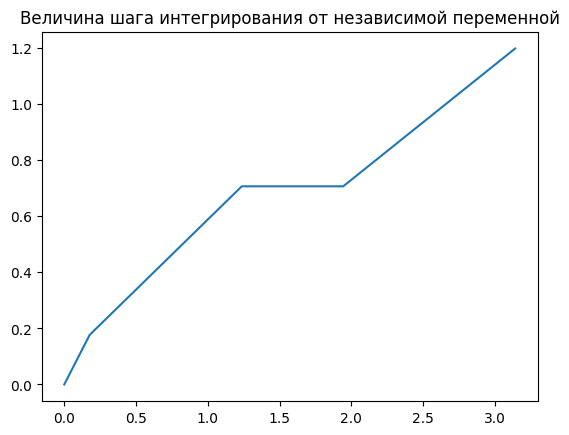

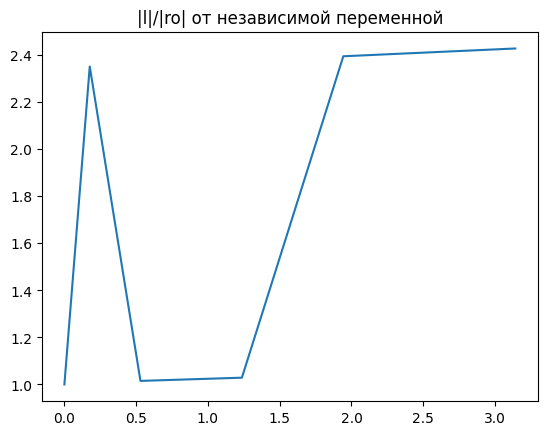

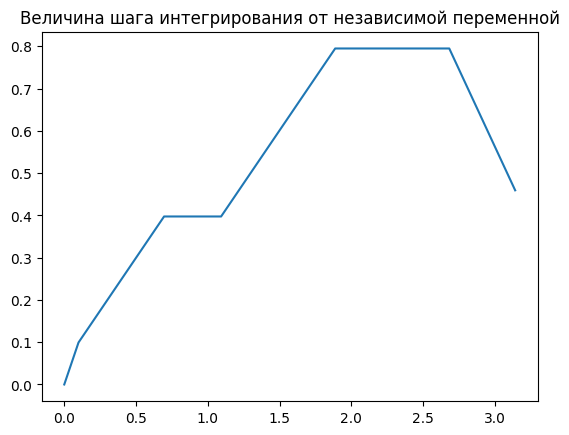

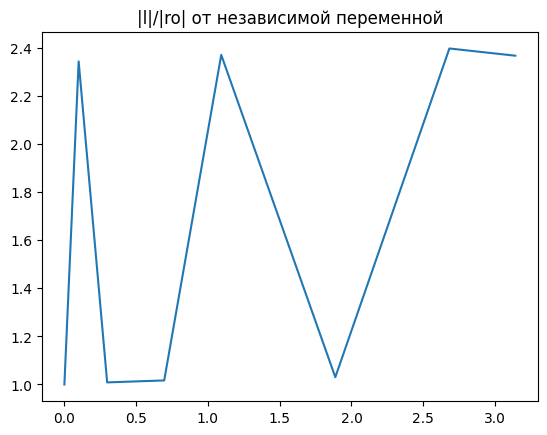

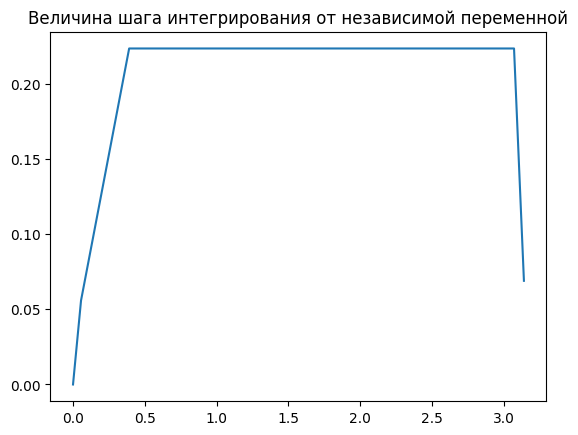

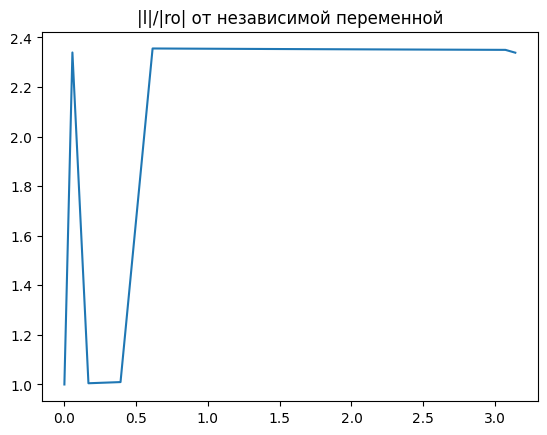

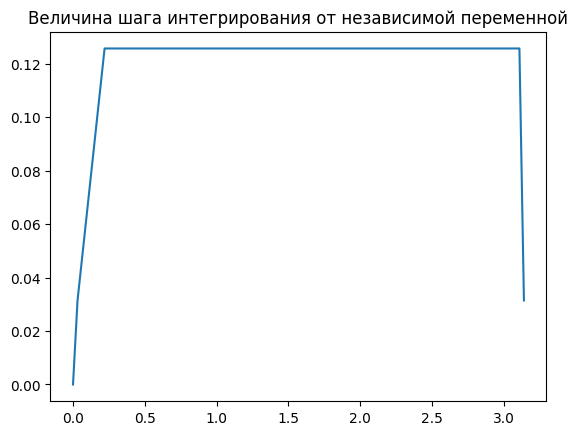

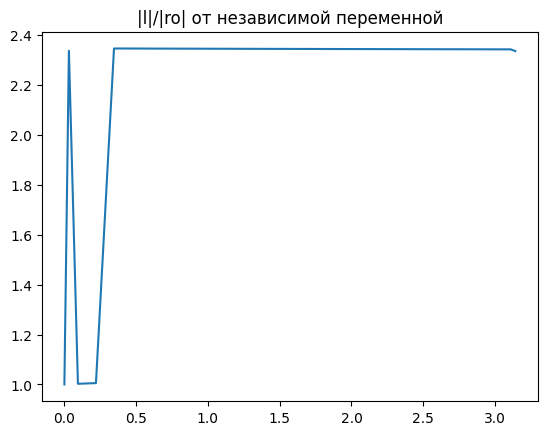

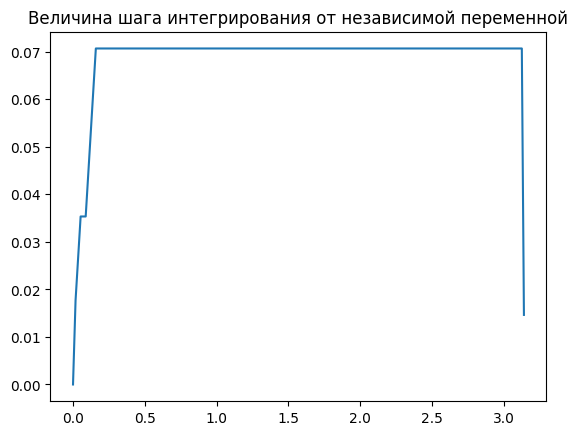

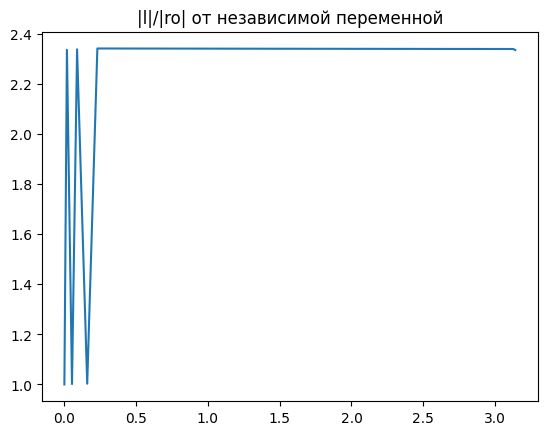

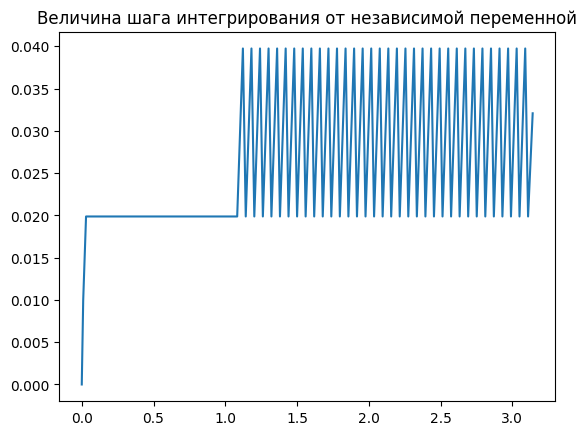

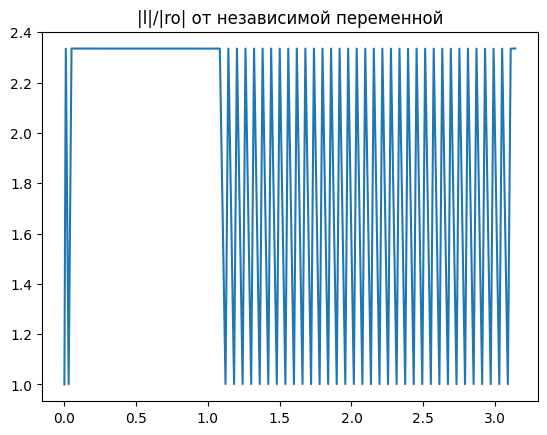

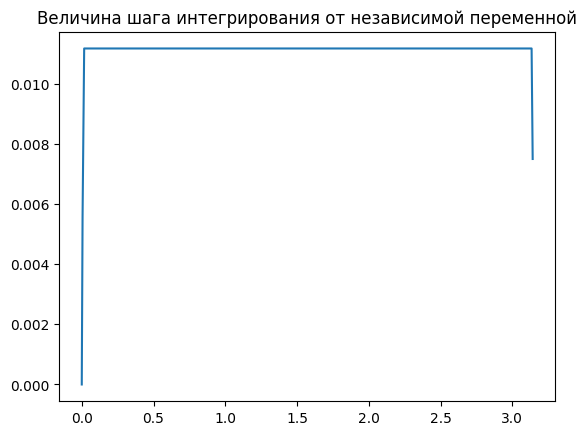

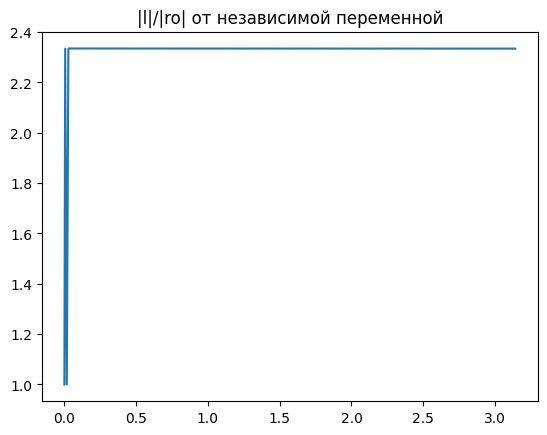

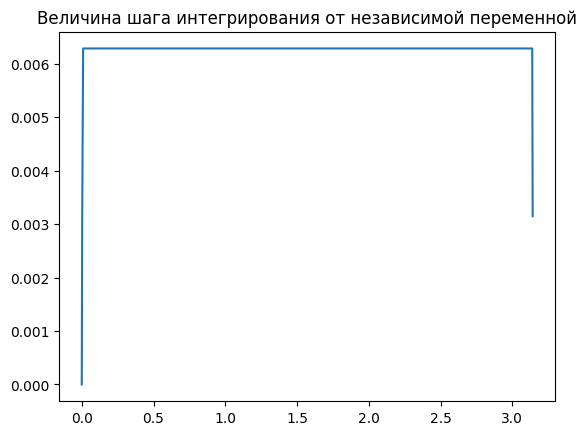

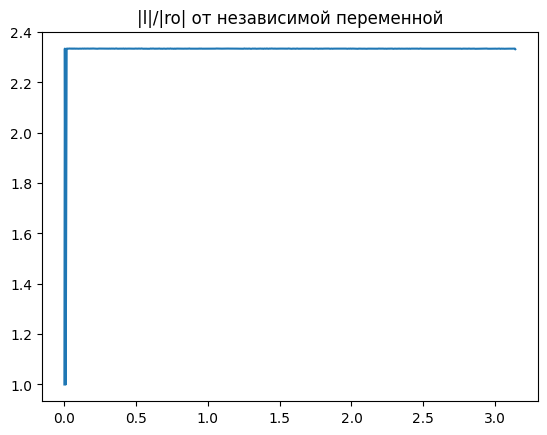

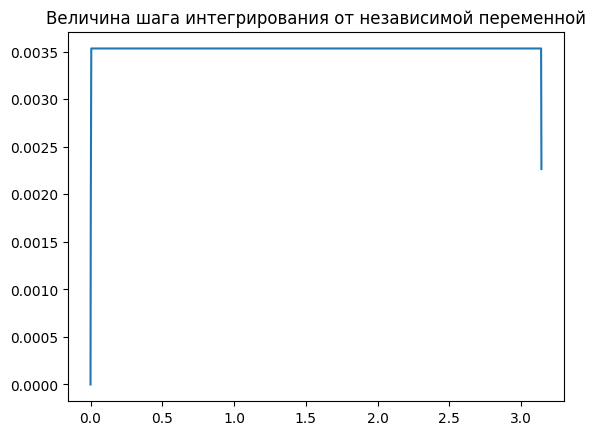

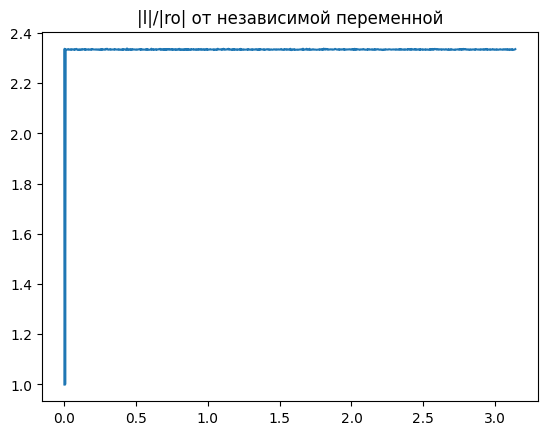

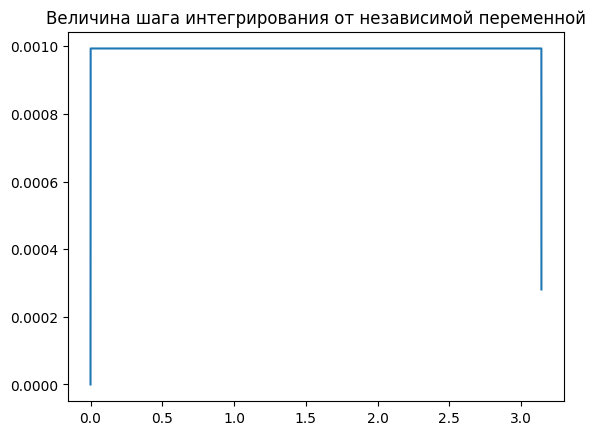

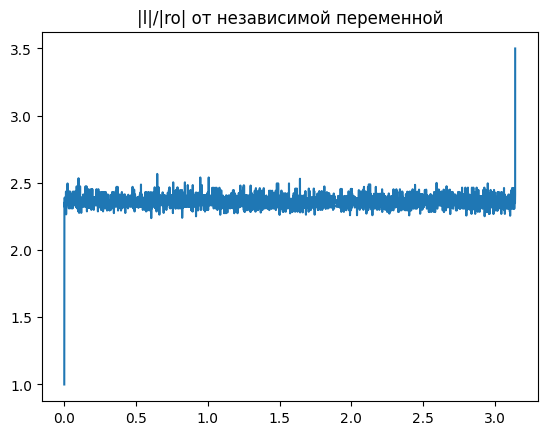

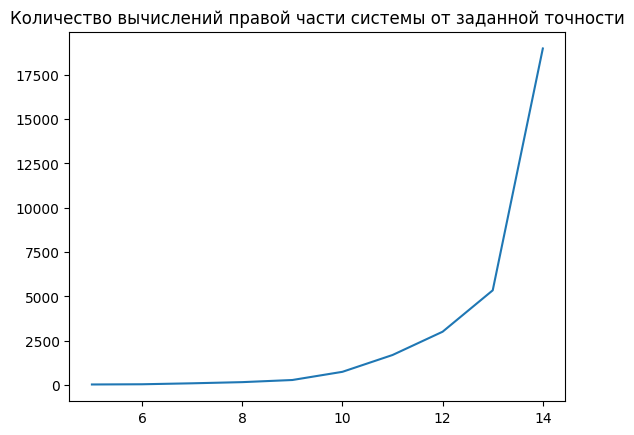

ЯМРК-3 с автоматическим шагом: 
 [np.float64(0.19812763981877451), np.float64(0.1814648601140474)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(y_1, y_2):
    return np.array([1/12*y_2, -1/20*y_1])

def find_h(x_0, x_k, y1_0, y2_0, s, eps):
    f_0 = f(y1_0, y2_0)
    delta = (1/max(abs(x_0), abs(x_k)))**(s+1)+np.linalg.norm(f_0)**(s+1)
    h = ((eps)/delta)**(1/(s+1))
    return h

def y1_find(x):
    return 2*np.pi*np.sin(x/10/np.sqrt(3))/15/np.sqrt(3)+np.pi*np.cos(x/10/np.sqrt(3))/20

def y2_find(x):
    return np.pi*np.cos(x/10/np.sqrt(3))/15-np.sqrt(3)*np.pi*np.sin(x/10/np.sqrt(3))/40

def chastnoe_reshenie(x, y_1, y_2, h):
    b = np.array([y_1, y_2])
    P = [[-2*np.cos(x/10/np.sqrt(3)), 2*np.sin(x/10/np.sqrt(3))], [np.sqrt(3)*np.sin(x/10/np.sqrt(3)), np.sqrt(3)*np.cos(x/10/np.sqrt(3))]]
    C = np.linalg.solve(P, b)
    return [-2*np.cos((x+h)/10/np.sqrt(3))*C[0]+2*np.sin((x+h)/10/np.sqrt(3))*C[1], np.sqrt(3)*np.sin((x+h)/10/np.sqrt(3))*C[0]+np.sqrt(3)*np.cos((x+h)/10/np.sqrt(3))*C[1]]



def Runge_Kutt_2(h, x_0, x_k, y_1, y_2):
    x = x_0+ h
    y0 = [y_1, y_2] #y(0)
    k_1 = h*f(y0[0], y0[1])
    k_2 = h*f(y0[0]+1/8*k_1[0], y0[1]+1/8*k_1[1])
    y1= [y0[0]-3*k_1[0]+4*k_2[0], y0[1]-3*k_1[1]+4*k_2[1]] #y(h)
    while True:
        if x>=x_k:
            x -= h
            #print(x)
            h = x_k-x
            x+=h
            #print(x)
            k_1 = h * f(y0[0], y0[1])
            k_2 = h * f(y0[0] + 1 / 8 * k_1[0], y0[1] + 1 / 8 * k_1[1])
            y1 = [y0[0] - 3 * k_1[0] + 4 * k_2[0], y0[1] - 3 * k_1[1] + 4 * k_2[1]]
            break
        y0 = y1
        x+=h
        k_1 = h * f(y0[0], y0[1])
        k_2 = h * f(y0[0] + 1 / 8 * k_1[0], y0[1] + 1 / 8 * k_1[1])
        y1 = [y0[0] - 3 * k_1[0] + 4 * k_2[0], y0[1] - 3 * k_1[1] + 4 * k_2[1]]
        #print(x)
    return y1

def full_error_2(x_k, y_1, y_2):
    eps = 1e-4
    h = find_h(0, x_k, y_1, y_2, 2, eps)

    y1 = Runge_Kutt_2(h, 0, x_k, y_1, y_2)
    h /= 2
    y2 = Runge_Kutt_2(h, 0, x_k, y_1, y_2)
    R = [(y2[0]-y1[0])/(2**2-1), (y2[1]-y1[1])/(2**2-1)]

    while max(abs(R[0]), abs(R[1]))>eps:
        y1 = y2
        h /=2
        y2 = Runge_Kutt_2(h, 0, x_k, y_1, y_2)
        #print(y2, y1)
        R = [(y2[0] - y1[0]) / (2 ** 2 - 1), (y2[1] - y1[1]) / (2 ** 2 - 1)]

        #print("Полная погрешность:", R, "для шага", h/i)
    print("Полная погрешность:", R, "для шага", h)

    absolute_error = [0]
    x_values = [0, h]
    j = 1
    while True:
        if (x_k-x_values[j])<(h):
            y = Runge_Kutt_2(h, 0, x_values[j], y_1, y_2)
            absolute_error.append(max(abs(y1_find(x_values[j]) - y[0]), abs(y2_find(x_values[j]) - y[1])))
            h1 = x_k - x_values[j]
            x_values.append(x_values[j]+h1)
            j += 1
            y = Runge_Kutt_2(h, 0, x_values[j], y_1, y_2)
            absolute_error.append(max(abs(y1_find(x_k) - y[0]), abs(y2_find(x_k) - y[1])))

            break

        y = Runge_Kutt_2(h, 0, x_values[j], y_1, y_2)
        #print(y, [y1_find(x_values[j]), y2_find(x_values[j])])
        absolute_error.append(max(abs(y1_find(x_values[j]) - y[0]), abs(y2_find(x_values[j]) - y[1])))
        x_values.append(x_values[j]+h)
        j+=1

    plt.figure()
    plt.title("Истинная полная погрешность от значения независимой переменной")
    plt.plot(x_values[:len(x_values)], absolute_error)
    plt.show()
    return y

def avtomatic_step_2(x_k, y_1, y_2, eps, s):
    #print(s)
    count = 0
    h_current = find_h(0, x_k, y_1, y_2, s, eps)
    x_values = [0]
    h_values = [0, h_current]
    x_current = h_current

    y1 = Runge_Kutt_2(h_current, 0, x_current, y_1, y_2)
    y2 = Runge_Kutt_2(h_current/2, 0, x_current, y_1, y_2)
    ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
    y_program_values = chastnoe_reshenie(0, y_1, y_2, h_current)
    l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
    error_value = [1, max(l[0] / ro[0], l[1] / ro[1])]
    x_values.append(x_current)
    y_current = y2
    y_values = [[y_1, y_2], y_current]
    count += 6
    #print(y2)
    while True:
        if x_current == x_k: break
        if x_current>x_k:
            x_values = x_values[:-1]
            h_values = h_values[:-1]
            error_value = error_value[:-1]
            x_current -= h_current
            h_current = x_k-x_current
            x_current += h_current
            y_values = y_values[:-1]
            y_current = y_values[-1]
            y1 = Runge_Kutt_2(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_2(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(l, ro)
            break
        if max(ro[0], ro[1])>eps*(2**s):
            #x_values = x_values[:-1]
            #h_values = h_values[:-1]
            y_values = y_values[:-1]
            y_current = y_values[-1]
            x_current -= h_current
            h_current /= 2
            x_current += h_current
            y1 = Runge_Kutt_2(h_current, x_current-h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_2(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current-h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(1)
            count += 6
        if (max(ro[0], ro[1])>eps) and (max(ro[0], ro[1])<=eps*(2**s)):
            h_current /= 2
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_2(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_2(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(2)
            count += 6
        if (max(ro[0], ro[1])>=eps/(2**(s+1))) and (max(ro[0], ro[1])<=eps):
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_2(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_2(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(3)
            count += 6
        if max(ro[0], ro[1])<eps/(2**(s+1)):
            h_current *= 2
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_2(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_2(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** 2 - 1)), abs((y2[1] - y1[1]) / (2 ** 2 - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(4)
            count += 6
        #print(y2)
    #print(y2)
    plt.figure()
    plt.title("Величина шага интегрирования от независимой переменной")
    plt.plot(x_values, h_values)


    plt.figure()
    plt.title("|l|/|ro| от независимой переменной")
    plt.plot(x_values, error_value)

    plt.show()
    return [y2, count]

def eps_from_j(x_k, y_1, y_2):
    eps = 1
    y2 = []
    count = []
    eps_value = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    for i in range (5, 15):
        eps = 10**(-i)
        #print(eps)
        d = avtomatic_step_2(x_k, y_1, y_2, eps, 2)
        y2 = d[0]
        count.append(d[1])
    plt.figure()
    plt.title("Количество вычислений правой части системы от заданной точности")
    plt.plot(eps_value, count)
    plt.show()
    return y2



def Runge_Kutt_3(h, x_0, x_k, y_1, y_2):
    x = x_0
    y0 = [y_1, y_2]
    k_1 = h*f(y0[0], y0[1])
    k_2 = h*f(y0[0]+0.5*k_1[0], y0[1]+0.5*k_1[1])
    k_3 = h*f(y0[0]-k_1[0]+2*k_2[0], y0[1]-k_1[1]+2*k_2[1])
    y1 = [y0[0]+1/6*(k_1[0]+4*k_2[0]+k_3[0]), y0[1]+1/6*(k_1[1]+4*k_2[1]+k_3[1])]
    while True:
        if x>=x_k:
            x -= h
            h = x_k-x
            k_1 = h * f(y0[0], y0[1])
            k_2 = h * f(y0[0] + 0.5 * k_1[0], y0[1] + 0.5 * k_1[1])
            k_3 = h * f(y0[0] - k_1[0] + 2 * k_2[0], y0[1] - k_1[1] + 2 * k_2[1])
            y1 = [y0[0] + 1 / 6 * (k_1[0] + 4 * k_2[0] + k_3[0]), y0[1] + 1 / 6 * (k_1[1] + 4 * k_2[1] + k_3[1])]
            break
        y0 = y1
        x+=h
        k_1 = h * f(y0[0], y0[1])
        k_2 = h * f(y0[0] + 0.5 * k_1[0], y0[1] + 0.5 * k_1[1])
        k_3 = h * f(y0[0] - k_1[0] + 2 * k_2[0], y0[1] - k_1[1] + 2 * k_2[1])
        y1 = [y0[0] + 1 / 6 * (k_1[0] + 4 * k_2[0] + k_3[0]), y0[1] + 1 / 6 * (k_1[1] + 4 * k_2[1] + k_3[1])]

    return y1

def full_error_3(x_k, y_1, y_2):
    eps = 1e-4
    h = find_h(0, x_k, y_1, y_2, 3, eps)

    y1 = Runge_Kutt_3(h, 0, x_k, y_1, y_2)
    h /= 2
    y2 = Runge_Kutt_3(h, 0, x_k, y_1, y_2)
    R = [(y2[0] - y1[0]) / (2 ** 3 - 1), (y2[1] - y1[1]) / (2 ** 3 - 1)]

    while max(abs(R[0]), abs(R[1])) > eps:
        y1 = y2
        h /= 2
        y2 = Runge_Kutt_3(h, 0, x_k, y_1, y_2)
        # print(y2, y1)
        R = [(y2[0] - y1[0]) / (2 ** 3 - 1), (y2[1] - y1[1]) / (2 ** 3 - 1)]

        # print("Полная погрешность:", R, "для шага", h/i)
    print("Полная погрешность:", R, "для шага", h)

    absolute_error = [0]
    x_values = [0, h]
    j = 1
    while True:
        if (x_k - x_values[j]) < h:
            y = Runge_Kutt_3(h, 0, x_values[j], y_1, y_2)
            absolute_error.append(max(abs(y1_find(x_values[j]) - y[0]), abs(y2_find(x_values[j]) - y[1])))
            h1 = x_k - x_values[j]
            x_values.append(x_values[j] + h1)
            j += 1
            y = Runge_Kutt_3(h, 0, x_values[j], y_1, y_2)
            absolute_error.append(max(abs(y1_find(x_k) - y[0]), abs(y2_find(x_k) - y[1])))

            break

        y = Runge_Kutt_3(h, 0, x_values[j], y_1, y_2)
        # print(y, [y1_find(x_values[j]), y2_find(x_values[j])])
        absolute_error.append(max(abs(y1_find(x_values[j]) - y[0]), abs(y2_find(x_values[j]) - y[1])))
        x_values.append(x_values[j] + h)
        j += 1

    plt.figure()
    plt.title("Истинная полная погрешность от значения независимой переменной")
    plt.plot(x_values[:len(x_values)], absolute_error)
    plt.show()
    return y

def avtomatic_step_3(x_k, y_1, y_2, eps, s):
    #print(s)
    count = 0
    h_current = find_h(0, x_k, y_1, y_2, s, eps)
    x_values = [0]
    h_values = [0, h_current]
    x_current = h_current

    y1 = Runge_Kutt_3(h_current, 0, x_current, y_1, y_2)
    y2 = Runge_Kutt_3(h_current/2, 0, x_current, y_1, y_2)
    ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
    y_program_values = chastnoe_reshenie(0, y_1, y_2, h_current)
    l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
    error_value = [1, max(l[0] / ro[0], l[1] / ro[1])]
    x_values.append(x_current)
    y_current = y2
    y_values = [[y_1, y_2], y_current]
    count += 9
    #print(y2)
    while True:
        if x_current == x_k: break
        if x_current>x_k:
            x_values = x_values[:-1]
            h_values = h_values[:-1]
            error_value = error_value[:-1]
            x_current -= h_current
            h_current = x_k-x_current
            x_current += h_current
            y_values = y_values[:-1]
            y_current = y_values[-1]
            y1 = Runge_Kutt_3(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_3(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(l, ro)
            break
        if max(ro[0], ro[1])>eps*(2**s):
            #x_values = x_values[:-1]
            #h_values = h_values[:-1]
            y_values = y_values[:-1]
            y_current = y_values[-1]
            x_current -= h_current
            h_current /= 2
            x_current += h_current
            y1 = Runge_Kutt_3(h_current, x_current-h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_3(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current-h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(1)
            count += 9
        if (max(ro[0], ro[1])>eps) and (max(ro[0], ro[1])<=eps*(2**s)):
            h_current /= 2
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_3(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_3(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(2)
            count += 9
        if (max(ro[0], ro[1])>=eps/(2**(s+1))) and (max(ro[0], ro[1])<=eps):
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_3(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_3(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(3)
            count += 9
        if max(ro[0], ro[1])<eps/(2**(s+1)):
            h_current *= 2
            x_current += h_current
            y_current = y_values[-1]
            y1 = Runge_Kutt_3(h_current, x_current - h_current, x_current, y_current[0], y_current[1])
            y2 = Runge_Kutt_3(h_current/2, x_current - h_current, x_current, y_current[0], y_current[1])
            ro = [abs((y2[0] - y1[0]) / (2 ** s - 1)), abs((y2[1] - y1[1]) / (2 ** s - 1))]
            y_program_values = chastnoe_reshenie(x_current - h_current, y_current[0], y_current[1], h_current)
            x_values.append(x_current)
            h_values.append(h_current)
            y_values.append(y2)
            l = [abs(y_program_values[0] - y2[0]), abs(y_program_values[1] - y2[1])]
            error_value.append(max(l[0] / ro[0], l[1] / ro[1]))
            #print(4)
            count += 9
        #print(y2)
    #print(y2)
    plt.figure()
    plt.title("Величина шага интегрирования от независимой переменной")
    plt.plot(x_values, h_values)


    plt.figure()
    plt.title("|l|/|ro| от независимой переменной")
    plt.plot(x_values, error_value)

    plt.show()
    return [y2, count]

def eps_from_j_3(x_k, y_1, y_2):
    y2 = []
    count = []
    eps_value = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    for i in range (5, 15):
        eps = 10**(-i)
        #print(eps)
        d = avtomatic_step_2(x_k, y_1, y_2, eps, 3)
        y2 = d[0]
        count.append(d[1])
    plt.figure()
    plt.title("Количество вычислений правой части системы от заданной точности")
    plt.plot(eps_value, count)
    plt.show()
    return y2





x_k = np.pi
y_1 = 1/20*np.pi
y_2 = 1/15*np.pi


print(y1_find(x_k), y2_find(x_k))
print("ЯМРК-2 с постоянным шагом:", "\n", full_error_2(x_k, y_1, y_2))
print("ЯМРК-3 с постоянным шагом:", "\n", full_error_3(x_k, y_1, y_2))
print("ЯМРК-2 с автоматическим шагом:", "\n", eps_from_j(x_k, y_1, y_2))
print("ЯМРК-3 с автоматическим шагом:", "\n", eps_from_j_3(x_k, y_1, y_2))